In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [182]:
#link
link = 'C:/Users/Jean Lavital/Desktop/P5_lavital_jean/'

In [183]:
#import des données 
df_population2021 = pd.read_csv(link + 'df_population2021.csv')

In [184]:
#import des données 
df_population2019 = pd.read_csv(link + 'df_population2019.csv')

In [185]:
#import des données 
df_animaux2019 = pd.read_csv(link + 'df_animaux2019.csv')

In [186]:
#import des données
df_vegetaux2019 = pd.read_csv(link + 'df_vegetaux2019.csv')

In [187]:
#import des données
df_volaille2020 = pd.read_csv(link + 'df_volaille2020.csv')

In [188]:
df_volaille2020 = df_volaille2020[['Zone','Valeur']]

In [189]:
df_volaille2020['Valeur']=df_volaille2020['Valeur']*1000

In [190]:
indexNames1 = df_volaille2020[df_volaille2020['Zone'] == 'Chine, continentale'].index

In [191]:
indexNames1

Int64Index([38], dtype='int64')

In [192]:
df_volaille2020.drop(indexNames1 , inplace=True)

In [193]:
df_volaille2020.rename(columns={'Valeur':'prod_volaille'}, inplace=True)

In [307]:
df_volaille2020

,Zone,prod_volaille
0,Afghanistan,27938000
1,Afrique du Sud,1873238000
2,Albanie,12234000
3,Algérie,260269000
4,Allemagne,1066000000
...,...,...
189,Venezuela (République bolivarienne du),406074000
190,Viet Nam,1146318000
191,Yémen,194546000
192,Zambie,51573000


# Echantillon de la Population

In [194]:
df_population2021=df_population2021[['Zone','Année','Valeur']]

In [195]:
df_population2019=df_population2019[['Zone','Année','Valeur']]

In [196]:
# renommage de la colonne Valeur et Année
df_population2021.rename(columns={'Valeur':'nb_population', 'Année':'Annee'}, inplace=True)

In [197]:
# renommage de la colonne Valeur et Année
df_population2019.rename(columns={'Valeur':'nb_population', 'Année':'Annee'}, inplace=True)

In [198]:
df_population2019['nb_population'] *= 1000

In [199]:
df_population2019

,Zone,Annee,nb_population
0,Afghanistan,2019,38042000
1,Afrique du Sud,2019,58558000
2,Albanie,2019,2881000
3,Algérie,2019,43053000
4,Allemagne,2019,83517000
...,...,...,...
174,Venezuela (République bolivarienne du),2019,28516000
175,Viet Nam,2019,96462000
176,Yémen,2019,29162000
177,Zambie,2019,17861000


In [200]:
df_population2021['nb_population'] *= 1000

In [201]:
df_population = pd.concat([df_population2021, df_population2019])

In [202]:
df_population.head()

,Zone,Annee,nb_population
0,Afghanistan,2021,39835428.0
1,Afrique du Sud,2021,60041994.0
2,Albanie,2021,2872933.0
3,Algérie,2021,44616624.0
4,Allemagne,2021,83900473.0


In [203]:
df_population.Annee.value_counts()

2021    237
2019    179
Name: Annee, dtype: int64

In [204]:
df_pop = df_population.pivot(values='nb_population',index='Zone',columns='Annee')

In [205]:
df_pop['diff_pop2019']=df_pop.apply(lambda x:round((x[2021]-x[2019])*100/x[2019],2), axis=1)

In [206]:
df_pop.head()

Annee,2019,2021,diff_pop2019
Zone,,,
Afghanistan,38042000.0,39835428.0,4.71
Afrique du Sud,58558000.0,60041994.0,2.53
Albanie,2881000.0,2872933.0,-0.28
Algérie,43053000.0,44616624.0,3.63
Allemagne,83517000.0,83900473.0,0.46


In [207]:
df_pop.reset_index()[df_pop.reset_index()['Zone']=='Iraq']

Annee,Zone,2019,2021,diff_pop2019
88,Iraq,33717000.0,41179350.0,22.13


In [208]:
df_pop1=df_pop.reset_index()[['Zone','diff_pop2019']]

In [209]:
df_pop1.head()

Annee,Zone,diff_pop2019
0,Afghanistan,4.71
1,Afrique du Sud,2.53
2,Albanie,-0.28
3,Algérie,3.63
4,Allemagne,0.46


# Echantillon pour les autres variables

In [210]:
#ajout de la variable origine
df_vegetaux2019["origine"]="vegetale"

In [211]:
#ajout de la variable origine
df_animaux2019["origine"]="animale"

In [212]:
df_animaux2019.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2731,Viande de Bovins,2019,2019,Milliers de tonnes,95.0,Im,Données de la FAO basées sur une méthodologie ...,animale
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2019,2019,Milliers de tonnes,5.0,Im,Données de la FAO basées sur une méthodologie ...,animale
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5072,Variation de stock,2731,Viande de Bovins,2019,2019,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...,animale
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5911,Exportations - Quantité,2731,Viande de Bovins,2019,2019,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...,animale
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2019,2019,Milliers de tonnes,101.0,S,Données standardisées,animale


In [213]:
df_vegetaux2019.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,origine
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2511,Blé et produits,2019,2019,Milliers de tonnes,4890.0,Im,Données de la FAO basées sur une méthodologie ...,vegetale
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2019,2019,Milliers de tonnes,2526.0,Im,Données de la FAO basées sur une méthodologie ...,vegetale
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2019,2019,Milliers de tonnes,-104.0,Im,Données de la FAO basées sur une méthodologie ...,vegetale
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2019,2019,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...,vegetale
4,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2019,2019,Milliers de tonnes,7519.0,S,Données standardisées,vegetale


In [214]:
data = pd.concat([df_animaux2019, df_vegetaux2019])

In [215]:
data = data.pivot_table(index=["Zone","Code zone","Produit","Code Produit","origine","Année"],values = "Valeur",columns = "Élément")

In [216]:
data = data.rename_axis(None,axis = 1)
data.reset_index(inplace=True)

In [217]:
data = pd.merge(data, df_pop, on= ["Zone"],how="inner")

In [218]:
data.head()

,Zone,Code zone,Produit,Code Produit,origine,Année,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),...,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,2019,2021,diff_pop2019
0,Afghanistan,2,Abats Comestible,2736,animale,2019,NaN,NaN,NaN,4.0,...,44.0,3.0,44.0,0.0,NaN,NaN,NaN,38042000.0,39835428.0,4.71
1,Afghanistan,2,"Agrumes, Autres",2614,vegetale,2019,NaN,NaN,NaN,1.0,...,63.0,3.0,39.0,0.0,NaN,NaN,0.0,38042000.0,39835428.0,4.71
2,Afghanistan,2,"Alcool, non Comestible",2659,vegetale,2019,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,38042000.0,39835428.0,4.71
3,Afghanistan,2,Aliments pour enfants,2680,vegetale,2019,NaN,NaN,NaN,1.0,...,2.0,NaN,NaN,0.0,NaN,NaN,0.0,38042000.0,39835428.0,4.71
4,Afghanistan,2,Ananas et produits,2618,vegetale,2019,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,0.0,NaN,NaN,0.0,38042000.0,39835428.0,4.71


In [219]:
indexNames = df_population[df_population['Zone'] == 'Chine, continentale'].index

In [220]:
indexNames

Int64Index([44, 35], dtype='int64')

In [221]:
data = data.loc[~data['Code zone'].isin([41]), :]

In [222]:
df_population.drop(indexNames , inplace=True)
print(df_population)

                                       Zone  Annee  nb_population
0                               Afghanistan   2021     39835428.0
1                            Afrique du Sud   2021     60041994.0
2                                   Albanie   2021      2872933.0
3                                   Algérie   2021     44616624.0
4                                 Allemagne   2021     83900473.0
..                                      ...    ...            ...
174  Venezuela (République bolivarienne du)   2019     28516000.0
175                                Viet Nam   2019     96462000.0
176                                   Yémen   2019     29162000.0
177                                  Zambie   2019     17861000.0
178                                Zimbabwe   2019     14645000.0

[412 rows x 3 columns]


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16564 entries, 0 to 16660
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           16564 non-null  object 
 1   Code zone                                                      16564 non-null  int64  
 2   Produit                                                        16564 non-null  object 
 3   Code Produit                                                   16564 non-null  int64  
 4   origine                                                        16564 non-null  object 
 5   Année                                                          16564 non-null  int64  
 6   Alimentation pour touristes                                    2929 non-null   float64
 7   Aliments pour animaux                                     

In [224]:
# calcul des disponibilités en cal et en protéines par habitant sur 2019
data['dispo_alim_cal'] = data["Disponibilité alimentaire (Kcal/personne/jour)"] * 1000 * data[2019] * 365
data['dispo_alim_prot'] = data["Disponibilité de protéines en quantité (g/personne/jour)"] * data[2019] * 365
# à verifier

In [225]:
dt1=data.groupby('Zone')['dispo_alim_cal'].sum().reset_index()

In [226]:
dt2=data.groupby('Zone')['dispo_alim_prot'].sum().reset_index()

In [227]:
dt1.head()

,Zone,dispo_alim_cal
0,Afghanistan,3.153358e+16
1,Afrique du Sud,6.179128e+16
2,Albanie,3.505918e+15
3,Algérie,5.484306e+16
4,Allemagne,1.084610e+17


In [228]:
prot_pays=data.groupby(['Zone','origine'])['Disponibilité de protéines en quantité (g/personne/jour)'].sum().reset_index()

In [230]:
prot_pays.head()

,Zone,origine,Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,animale,10.34
1,Afghanistan,vegetale,46.95
2,Afrique du Sud,animale,35.12
3,Afrique du Sud,vegetale,44.61
4,Albanie,animale,62.46


In [231]:
prot_pays_anim_veget = prot_pays.pivot(values='Disponibilité de protéines en quantité (g/personne/jour)',index='Zone',columns='origine').reset_index()

In [232]:
prot_pays_anim_veget.head()

origine,Zone,animale,vegetale
0,Afghanistan,10.34,46.95
1,Afrique du Sud,35.12,44.61
2,Albanie,62.46,53.52
3,Algérie,24.09,66.73
4,Allemagne,62.72,41.49


In [233]:
prot_pays_anim_veget['prop_prot_animale']=prot_pays_anim_veget.apply(lambda x:x['animale']*100/(x['animale']+x['vegetale']),axis=1)

In [234]:
prot_pays_anim_veget.head()

origine,Zone,animale,vegetale,prop_prot_animale
0,Afghanistan,10.34,46.95,18.048525
1,Afrique du Sud,35.12,44.61,44.048664
2,Albanie,62.46,53.52,53.854113
3,Algérie,24.09,66.73,26.524994
4,Allemagne,62.72,41.49,60.186163


In [235]:
dt = pd.merge(dt1, dt2, on=['Zone'], how='left')

In [236]:
dt = pd.merge(dt, prot_pays_anim_veget, on=['Zone'], how='left')

In [237]:
dt = pd.merge(dt, df_pop1, on=['Zone'], how='left')

In [238]:
dt = pd.merge(dt, df_volaille2020, on=['Zone'], how='left')

In [239]:
dt.head()

,Zone,dispo_alim_cal,dispo_alim_prot,animale,vegetale,prop_prot_animale,diff_pop2019,prod_volaille
0,Afghanistan,3.153358e+16,7.954906e+11,10.34,46.95,18.048525,4.71,2.793800e+07
1,Afrique du Sud,6.179128e+16,1.704123e+12,35.12,44.61,44.048664,2.53,1.873238e+09
2,Albanie,3.505918e+15,1.219605e+11,62.46,53.52,53.854113,-0.28,1.223400e+07
3,Algérie,5.484306e+16,1.427177e+12,24.09,66.73,26.524994,3.63,2.602690e+08
4,Allemagne,1.084610e+17,3.176707e+12,62.72,41.49,60.186163,0.46,1.066000e+09


In [308]:
data_filter = dt[["Zone","diff_pop2019","dispo_alim_cal","dispo_alim_prot","prop_prot_animale","prod_volaille"]].drop_duplicates()

In [309]:
data_filter.head()

,Zone,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille
0,Afghanistan,4.71,3.153358e+16,7.954906e+11,18.048525,2.793800e+07
1,Afrique du Sud,2.53,6.179128e+16,1.704123e+12,44.048664,1.873238e+09
2,Albanie,-0.28,3.505918e+15,1.219605e+11,53.854113,1.223400e+07
3,Algérie,3.63,5.484306e+16,1.427177e+12,26.524994,2.602690e+08
4,Allemagne,0.46,1.084610e+17,3.176707e+12,60.186163,1.066000e+09


# Réalisation de L'ACP 

In [310]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

In [311]:
from functions import display_circles, display_scree_plot, display_factorial_planes

In [312]:
# choix du nombre de composantes à calculer
n_comp = 3

In [313]:
# selection des colonnes à prendre en compte dans l'ACP
data_filter2 = data_filter.copy()

In [314]:
data_filter2

,Zone,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille
0,Afghanistan,4.71,3.153358e+16,7.954906e+11,18.048525,2.793800e+07
1,Afrique du Sud,2.53,6.179128e+16,1.704123e+12,44.048664,1.873238e+09
2,Albanie,-0.28,3.505918e+15,1.219605e+11,53.854113,1.223400e+07
3,Algérie,3.63,5.484306e+16,1.427177e+12,26.524994,2.602690e+08
4,Allemagne,0.46,1.084610e+17,3.176707e+12,60.186163,1.066000e+09
...,...,...,...,...,...,...
173,Égypte,3.86,1.210639e+17,3.499641e+12,24.761805,1.339068e+09
174,Équateur,2.96,1.624695e+16,4.061103e+11,51.030606,3.310010e+08
175,États-Unis d'Amérique,1.17,4.637398e+17,1.380289e+13,66.072050,2.049025e+10
176,Éthiopie,5.17,9.957210e+16,2.886527e+12,9.084467,6.780300e+07


In [376]:
data_filter2.loc[(data_filter2['prop_prot_animale'] < 20)&(data_filter2['prod_volaille'] < 1.0e+8),:]

,Zone,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille
Zone,,,,,,
Afghanistan,Afghanistan,4.71,3.153358e+16,7.954906e+11,18.048525,27938000.0
Burkina Faso,Burkina Faso,5.79,2.028595e+16,5.944858e+11,13.562071,45297000.0
Burundi,Burundi,6.28,7.676879e+15,1.825784e+11,7.123098,6653000.0
Cameroun,Cameroun,5.21,2.617137e+16,6.797379e+11,15.284146,85298000.0
Djibouti,Djibouti,2.89,9.929394e+14,2.338189e+10,19.781055,70769500.0
Guinée-Bissau,Guinée-Bissau,4.92,1.563598e+15,3.034642e+10,19.408503,3155000.0
Niger,Niger,7.81,2.230082e+16,7.214370e+11,12.265597,20103000.0
Népal,Népal,3.73,3.008422e+16,7.801431e+11,18.110025,65000000.0
Rwanda,Rwanda,5.14,1.019940e+16,2.711389e+11,14.482407,19336000.0


In [437]:
# préparation des données pour l'ACP
data_filter2 = data_filter2.fillna(data_filter2.median()) # Il est fréquent de remplacer les valeurs inconnues par la mediane de la variable
data_filter2.index=data_filter2.Zone
X= data_filter2.drop(['Zone'],axis=1)
X= X.values
names = data_filter2.index # ou data.index pour avoir les intitulés
features = data_filter2.columns[1:]

In [379]:
features

Index(['diff_pop2019', 'dispo_alim_cal', 'dispo_alim_prot',
       'prop_prot_animale', 'prod_volaille'],
      dtype='object')

In [380]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [381]:
# Calcul des composantes principales
acp = decomposition.PCA(n_components=n_comp)
acp.fit(X_scaled)

PCA(n_components=3)

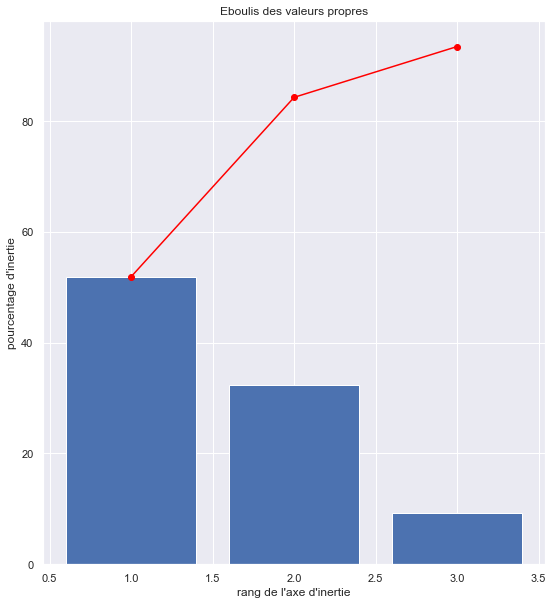

In [382]:
# Eboulis des valeurs propres
display_scree_plot(acp)

In [383]:
#Selon le pourcentage d'inertie, on peut choisir comme nombre de composants : 3 

In [384]:
# Calcul des composantes principales
acp = decomposition.PCA(n_components=3)
acp.fit(X_scaled)

PCA(n_components=3)

In [385]:
# Cercle des corrélations
pcs = acp.components_

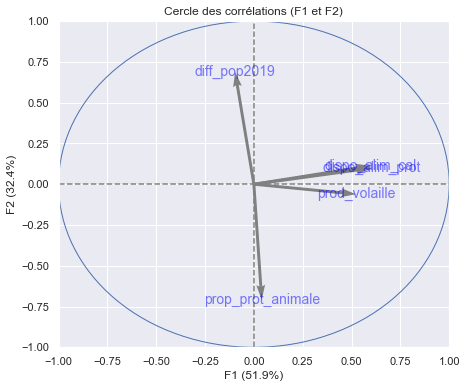

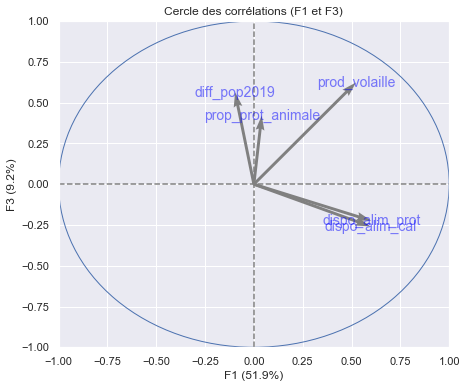

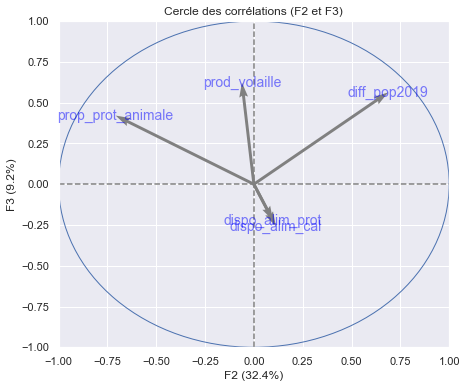

In [386]:
display_circles(pcs, n_comp, acp, [(0,1),(0,2),(1,2)], labels = np.array(features))

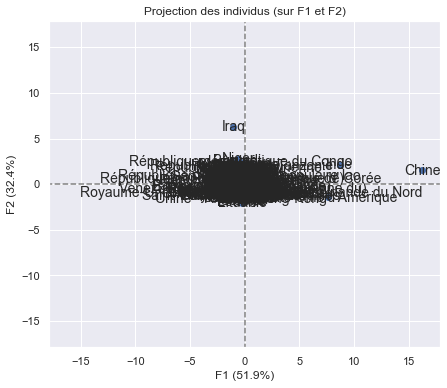

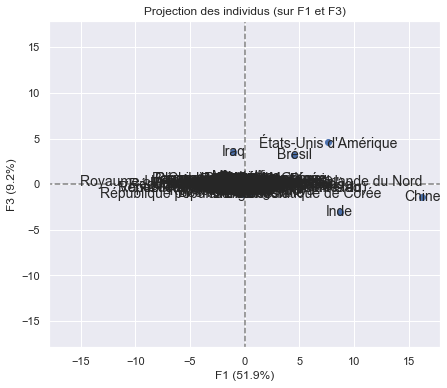

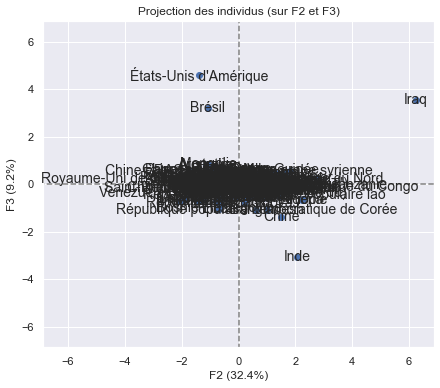

In [387]:
# Projection des individus
X_projected = acp.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, acp, [(0,1),(0,2),(1,2)], labels = np.array(names))

plt.show()

# Réalisation du dendrogramme

In [388]:
from functions import *

In [389]:
import pandas as pd
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

In [390]:
# data_filter.index=data_filter.Zone

In [391]:
# data_filter=data_filter.drop('Zone', axis=1)

In [392]:
# préparation des données pour le clustering
# X = data_filter.values
# names = data_filter.index

In [393]:
# Centrage et Réduction
# std_scale = preprocessing.StandardScaler().fit(X)
# X_scaled = std_scale.transform(X)

In [394]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

In [395]:
clusters = fcluster(Z, 5, criterion='maxclust')

In [396]:
clusters

array([3, 5, 4, 5, 4, 3, 4, 5, 4, 4, 4, 4, 5, 4, 3, 4, 4, 5, 5, 4, 5, 1,
       4, 3, 3, 4, 3, 5, 5, 3, 5, 4, 2, 4, 4, 4, 4, 5, 3, 5, 4, 4, 4, 3,
       4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 5, 5, 3, 3, 4, 4, 3, 3, 3, 4, 4, 5,
       3, 4, 2, 5, 5, 3, 4, 4, 4, 4, 4, 4, 5, 4, 3, 5, 5, 5, 5, 4, 4, 5,
       3, 4, 4, 4, 3, 5, 3, 4, 3, 4, 5, 4, 3, 5, 4, 4, 3, 5, 3, 5, 3, 3,
       4, 4, 4, 3, 5, 3, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 3, 3, 5,
       4, 4, 4, 3, 5, 5, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 5, 4, 4, 4,
       3, 3, 3, 4, 5, 3, 3, 4, 5, 5, 5, 4, 4, 5, 4, 5, 3, 3, 5, 3, 5, 1,
       3, 3], dtype=int32)

In [397]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(5,10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left"
    )
    plt.axvline(x=7.5, c='k')
    plt.show()

In [398]:
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe', 'Égypte', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=178)

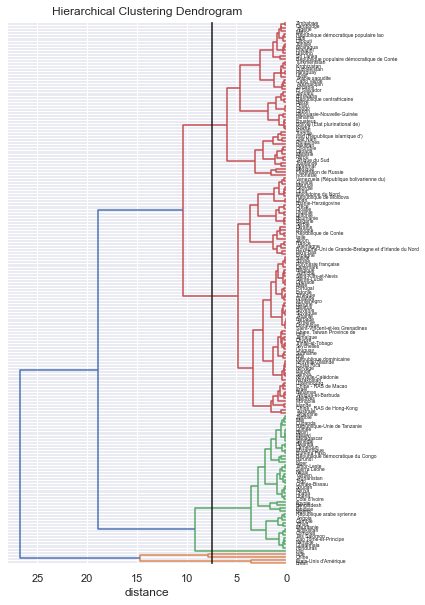

In [399]:
plot_dendrogram(Z, names)

In [400]:
# Coupage du dendrogramme en 5 clusters
#clusters = fcluster(Z, 5, criterion='maxclust')
#clusters = fcluster(Z, 159, criterion='distance') # ligne équivalente à la précédente

# Comparaison des clusters 
groupes = pd.DataFrame({"cluster": clusters, "pays": names})
#print(groupes)
groupes.sort_values(by=['cluster'])


,cluster,pays
175,1,États-Unis d'Amérique
21,1,Brésil
32,2,Chine
68,2,Inde
0,3,Afghanistan
...,...,...
69,5,Indonésie
93,5,Malaisie
137,5,République populaire démocratique de Corée
116,5,Ouzbékistan


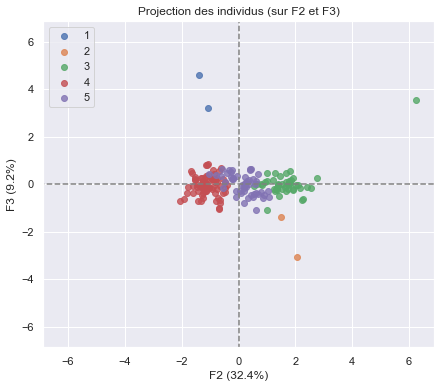

In [401]:
# Transform the scaled data to the new PCA space
X_reduced = acp.transform(X_scaled)
display_factorial_planes(X_reduced, 5, acp, [(1,2)], illustrative_var = clusters, alpha = 0.8)

In [402]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
y = pdist(X_scaled)
# centroids
centroid(y)

array([[9.20000000e+01, 9.40000000e+01, 3.73410228e-02, 2.00000000e+00],
       [9.00000000e+00, 1.50000000e+01, 4.33873779e-02, 2.00000000e+00],
       [3.90000000e+01, 1.14000000e+02, 5.56839361e-02, 2.00000000e+00],
       [5.80000000e+01, 1.41000000e+02, 5.68386302e-02, 2.00000000e+00],
       [4.60000000e+01, 1.79000000e+02, 5.73883192e-02, 3.00000000e+00],
       [1.47000000e+02, 1.48000000e+02, 5.98957795e-02, 2.00000000e+00],
       [2.60000000e+01, 1.78000000e+02, 6.72315440e-02, 3.00000000e+00],
       [1.90000000e+01, 8.60000000e+01, 7.41765492e-02, 2.00000000e+00],
       [1.40000000e+02, 1.82000000e+02, 8.05448404e-02, 4.00000000e+00],
       [9.60000000e+01, 1.71000000e+02, 8.27946491e-02, 2.00000000e+00],
       [4.00000000e+01, 1.12000000e+02, 8.45537102e-02, 2.00000000e+00],
       [8.20000000e+01, 8.30000000e+01, 8.46076456e-02, 2.00000000e+00],
       [5.50000000e+01, 1.80000000e+02, 8.59896632e-02, 3.00000000e+00],
       [9.70000000e+01, 1.81000000e+02, 9.21423464e

In [403]:
fcluster(Z, t=0.9, criterion='distance')

array([11, 36, 21, 47, 25,  6, 18, 44, 16, 21, 16, 23, 43, 18,  8, 21, 23,
       42, 40, 30, 42,  1, 28, 13, 12, 21, 14, 43, 47, 13, 37, 20,  3, 17,
       18, 20, 20, 37,  5, 41, 19, 29, 31, 10, 23, 47, 21, 43, 24, 22, 46,
       20, 22, 25, 32, 41,  6, 10, 23, 29,  5, 14, 11, 31, 31, 47,  5, 21,
        4, 34, 38, 15, 19, 17, 18, 26, 20, 27, 43, 19, 10, 44, 40, 40, 46,
       29, 30, 44, 10, 29, 18, 31, 14, 37, 14, 18, 14, 23, 47, 31,  6, 33,
       18, 22, 13, 35,  5, 46, 12,  7, 19, 19, 19, 11, 41, 14, 44, 39, 40,
       40, 44, 24, 38, 26, 23, 22, 36, 28, 25, 13,  6, 42, 26, 31, 20, 12,
       47, 45, 14, 23, 21, 23, 19,  5, 28, 20, 11, 21, 21, 10, 45, 23, 20,
       23, 14,  5,  6, 22, 35, 11, 11, 20, 46, 44, 38, 26, 20, 42, 31, 38,
       11, 14, 47,  9, 40,  2,  7,  5], dtype=int32)

In [404]:
#kmeans pour recuperer les coordonnées des centroides( pas sur que ce c'est ce qu(il faut faire))
## kmeans clustering
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(X_scaled)
#les centroïdes des groupes et leurs coordonnées dans chacune des dimensions.
print(kmeans.cluster_centers_)

[[ 0.66736324 -0.08886413 -0.10203039 -0.92566638 -0.19180918]
 [-0.421286    8.74830718  8.5916894  -0.69004161  3.98643694]
 [-0.59619263 -0.14806884 -0.13442772  0.74683813 -0.07852767]
 [-0.45020947  1.82282921  1.84021884  1.21116211  7.28149894]
 [ 7.59051433 -0.08512627 -0.10241591 -1.46239042 -0.22790824]]


# Position des centroides

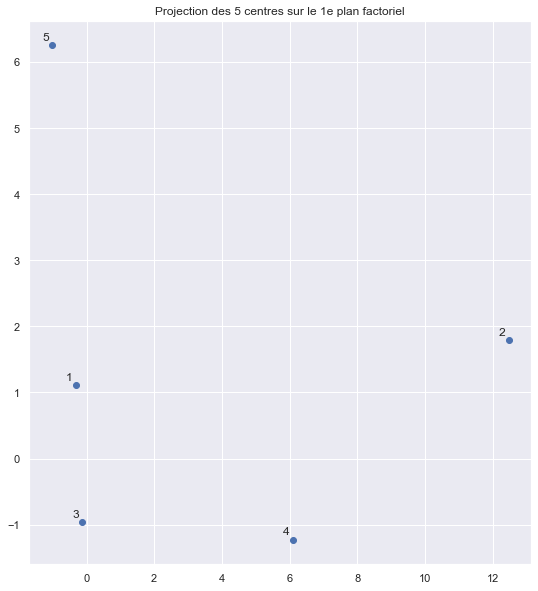

In [405]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans.cluster_centers_
centroids_projected = acp.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], label = 'True position')
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
for cluster, x, y in zip(set(clusters.tolist()), centroids_projected[:, 0], centroids_projected[:, 1]):
    plt.annotate(
       cluster,
     xy=(x, y), xytext=(-3, 3),
     textcoords='offset points', ha='right', va='bottom')
plt.show()

In [406]:
data_filter2.columns[1:]

Index(['diff_pop2019', 'dispo_alim_cal', 'dispo_alim_prot',
       'prop_prot_animale', 'prod_volaille'],
      dtype='object')

In [407]:
# on met les données à la même échelle pour pouvoir comparer
dt_scaled = pd.DataFrame(X_scaled, columns= list(data_filter.columns[1:]), index=dt.index)

In [408]:
dt_scaled.head()

,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille
0,0.872557,-0.088573,-0.102763,-1.538008,-0.284779
1,0.031848,0.089119,0.078897,0.077928,0.531194
2,-1.051818,-0.253169,-0.237421,0.687347,-0.291723
3,0.456059,0.048315,0.023528,-1.011187,-0.182044
4,-0.766439,0.363193,0.373307,1.080890,0.174242


In [409]:
data_cluster = pd.merge(dt_scaled,dt[['Zone']], left_index= True, right_index = True, how='left')

In [410]:
groupes.head()

,cluster,pays
0,3,Afghanistan
1,5,Afrique du Sud
2,4,Albanie
3,5,Algérie
4,4,Allemagne


In [411]:
data_cluster.head()

,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille,Zone
0,0.872557,-0.088573,-0.102763,-1.538008,-0.284779,Afghanistan
1,0.031848,0.089119,0.078897,0.077928,0.531194,Afrique du Sud
2,-1.051818,-0.253169,-0.237421,0.687347,-0.291723,Albanie
3,0.456059,0.048315,0.023528,-1.011187,-0.182044,Algérie
4,-0.766439,0.363193,0.373307,1.080890,0.174242,Allemagne


In [412]:
#on ajoute les groupes entre eux 
data_clusters = pd.merge(data_cluster,groupes, left_on = 'Zone',right_on = 'pays', how = 'left' )

In [413]:
data_clusters.head()

,diff_pop2019,dispo_alim_cal,dispo_alim_prot,prop_prot_animale,prod_volaille,Zone,cluster,pays
0,0.872557,-0.088573,-0.102763,-1.538008,-0.284779,Afghanistan,3,Afghanistan
1,0.031848,0.089119,0.078897,0.077928,0.531194,Afrique du Sud,5,Afrique du Sud
2,-1.051818,-0.253169,-0.237421,0.687347,-0.291723,Albanie,4,Albanie
3,0.456059,0.048315,0.023528,-1.011187,-0.182044,Algérie,5,Algérie
4,-0.766439,0.363193,0.373307,1.080890,0.174242,Allemagne,4,Allemagne


In [414]:
# Je recupère juste les moyenne pour faire un heatmap
data_clusters_mean = data_clusters.groupby('cluster').agg('mean')

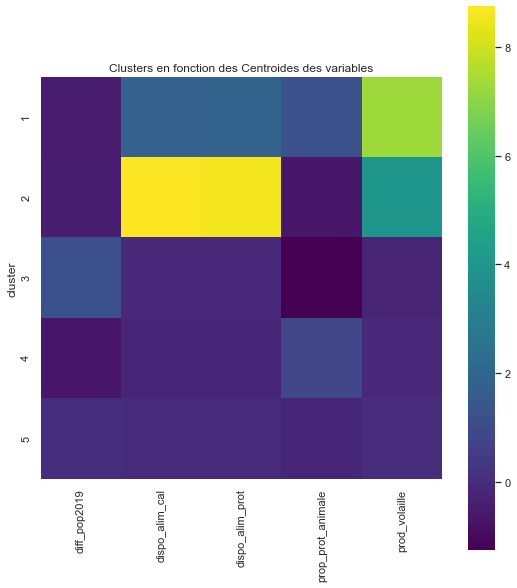

In [415]:
#On fait un heatmap pour voir les centroides
import seaborn as sns
plt.figure()
plt.title('Clusters en fonction des Centroides des variables')
sns.set(rc={'figure.figsize':(9,10)})
sns.heatmap(data_clusters_mean,cmap = 'viridis',cbar = True,square = True )
plt.title('Clusters en fonction des Centroides des variables')
plt.show()


In [416]:
groupe1 = data_clusters.loc[data_clusters['cluster']==1]
groupe1['pays']

21                    Brésil
175    États-Unis d'Amérique
Name: pays, dtype: object

In [417]:
groupe2 = data_clusters.loc[data_clusters['cluster']==2]
groupe2['pays']

32    Chine
68     Inde
Name: pays, dtype: object

In [418]:
groupe3 = data_clusters.loc[data_clusters['cluster']==3]
groupe3['pays']

0                           Afghanistan
5                                Angola
14                           Bangladesh
23                         Burkina Faso
24                              Burundi
26                                Bénin
29                             Cameroun
38                              Comores
43                        Côte d'Ivoire
56                               Gambie
57                                Ghana
60                            Guatemala
61                               Guinée
62                        Guinée-Bissau
66                             Honduras
71                                 Iraq
80                                Kenya
88                              Libéria
92                           Madagascar
94                               Malawi
96                                 Mali
100                          Mauritanie
104                          Mozambique
106                             Namibie
108                               Niger


In [419]:
groupe4 = data_clusters.loc[data_clusters['cluster']==4]
groupe4['pays']

2                                     Albanie
4                                   Allemagne
6                          Antigua-et-Barbuda
8                                   Argentine
9                                     Arménie
                        ...                  
157                                  Tchéquie
161                         Trinité-et-Tobago
165                                   Ukraine
166                                   Uruguay
168    Venezuela (République bolivarienne du)
Name: pays, Length: 78, dtype: object

In [420]:
groupe5 = data_clusters.loc[data_clusters['cluster']==5]
groupe5['pays']

1                                  Afrique du Sud
3                                         Algérie
7                                 Arabie saoudite
12                                    Azerbaïdjan
17                                         Belize
18                Bolivie (État plurinational de)
20                                       Botswana
27                                     Cabo Verde
28                                       Cambodge
30                                         Canada
37                                       Colombie
39                                          Congo
45                                       Djibouti
47                                    El Salvador
50                                       Eswatini
54                           Fédération de Russie
55                                          Gabon
65                                          Haïti
69                                      Indonésie
70                 Iran (République islamique d')


# Test d'adéquation : Kolgomorov-Smirnov

In [421]:
#Test de la variable proportion protéine animale
#on calcule d'abord la moyenne et l'écart type de la variable et on les passe dans la fonction 
import random
from scipy.stats import ks_2samp
import numpy
#on met un random seed pour avoir les mêmes résultats.
np.random.seed(1234)
ks_2samp(dt["prop_prot_animale"],list(numpy.random.normal(numpy.mean(dt['prop_prot_animale']), numpy.std(dt['prop_prot_animale']),1000)))


KstestResult(statistic=0.11278651685393258, pvalue=0.039152924000616984)

In [422]:
# Hypothèse H0 : La variable prop_prot_animale suit une loi normale
# Hypothèse H1 : La variable prop_prot animale ne suit pas une loi normale

In [423]:
# Avec une pvalue de 0,03 < 0,05, on peut rejeter l'hypothèse H0 nulle selon laquelle la variable prop_prot_animale suivrait une loi normale

In [424]:
#Test de la variable disponibilité alimentaire en protéines
#on calcule d'abord la moyenne et l'écart type de la variable et on les passe dans la fonction 
import random
from scipy.stats import ks_2samp
import numpy
#on met un random seed pour avoir les mêmes résultats.
np.random.seed(1234)
ks_2samp(dt["dispo_alim_prot"],list(numpy.random.normal(numpy.mean(dt['dispo_alim_prot']), numpy.std(dt['dispo_alim_prot']),1000)))

KstestResult(statistic=0.384, pvalue=3.3306690738754696e-16)

In [425]:
# Hypothèse H0 : La variable disponibilité alimentaire en protéines suit une loi normale
# Hypothèse H1 : La variable disponibilité alimentaire en protéines ne suit pas une loi normale

In [426]:
# Avec une pvalue de 3.3306690738754696e-16 < 0,05, on peut rejeter l'hypothèse H0 nulle selon laquelle la variable variable disponibilité alimentaires suivrait une loi normale

In [427]:
#Test de la variable disponibilité alimentaires en protéines
#on calcule d'abord la moyenne et l'écart type de la variable et on les passe dans la fonction 
import random
from scipy.stats import ks_2samp
import numpy
#on met un random seed pour avoir les mêmes résultats.
np.random.seed(1234)
ks_2samp(dt["dispo_alim_cal"],list(numpy.random.normal(numpy.mean(dt['dispo_alim_cal']), numpy.std(dt['dispo_alim_cal']),1000)))

KstestResult(statistic=0.381, pvalue=3.3306690738754696e-16)

In [428]:
# Hypothèse H0 : La variable disponibilité alimentaire en calories suit une loi normale
# Hypothèse H1 : La variable disponibilité alimentaire en calories ne suit pas une loi normale

In [429]:
# Avec une pvalue de 3.3306690738754696e-16 < 0,05, on peut rejeter l'hypothèse H0 nulle selon laquelle la variable variable disponibilité alimentaire en calories suivrait une loi normale

In [430]:
#Test de la variable différence de population en 2019 en protéines
#on calcule d'abord la moyenne et l'écart type de la variable et on les passe dans la fonction 
import random
from scipy.stats import ks_2samp
import numpy
#on met un random seed pour avoir les mêmes résultats.
np.random.seed(1234)
ks_2samp(dt["diff_pop2019"],list(numpy.random.normal(numpy.mean(dt['diff_pop2019']), numpy.std(dt['diff_pop2019']),1000)))

KstestResult(statistic=0.08530337078651686, pvalue=0.20776203914987712)

In [431]:
# Hypothèse H0 : La variable différence de population en 2019 suit une loi normale
# Hypothèse H1 : La variable différence de population en 2019 ne suit pas une loi normale

In [432]:
# Avec une pvalue de 0.20776203914987712 > 0,05, on peut accepter l'hypothèse H0 nulle selon laquelle la variable différence de population en 2019 suivrait une loi normale

In [433]:
# La variable "diff_pop2019" suit une loi normale

In [ ]:
#Test de la variable production volaille (2020) 
#on calcule d'abord la moyenne et l'écart type de la variable et on les passe dans la fonction 
import random
from scipy.stats import ks_2samp
import numpy
#on met un random seed pour avoir les mêmes résultats.
np.random.seed(1234)
ks_2samp(dt["prod_volaille"],list(numpy.random.normal(numpy.mean(dt['prod_volaille']), numpy.std(dt['prod_volaille']),1000)))

In [ ]:
# Hypothèse H0 : La variable production volaille (2020) suit une loi normale
# Hypothèse H1 : La variable production volaille (2020) ne suit pas une loi normale

In [ ]:
# Avec une pvalue de 0.20776203914987712 > 0,05, on peut accepter l'hypothèse H0 nulle selon laquelle la variable différence de population en 2019 suivrait une loi normale

# Test de comparaison des clusters

In [434]:
cluster1=groupe1['diff_pop2019']
cluster2=groupe2['diff_pop2019']

In [435]:
#Test d'égalité des variances 
from scipy.stats import bartlett
bartlett(cluster1,cluster2)

BartlettResult(statistic=1.4328400397032037, pvalue=0.23130150119148746)

In [436]:
#On teste ensuite l’égalité des moyennes 
from scipy.stats import ttest_ind
ttest_ind(cluster1,cluster2)

Ttest_indResult(statistic=-0.11818353288647025, pvalue=0.9167219100390374)